In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

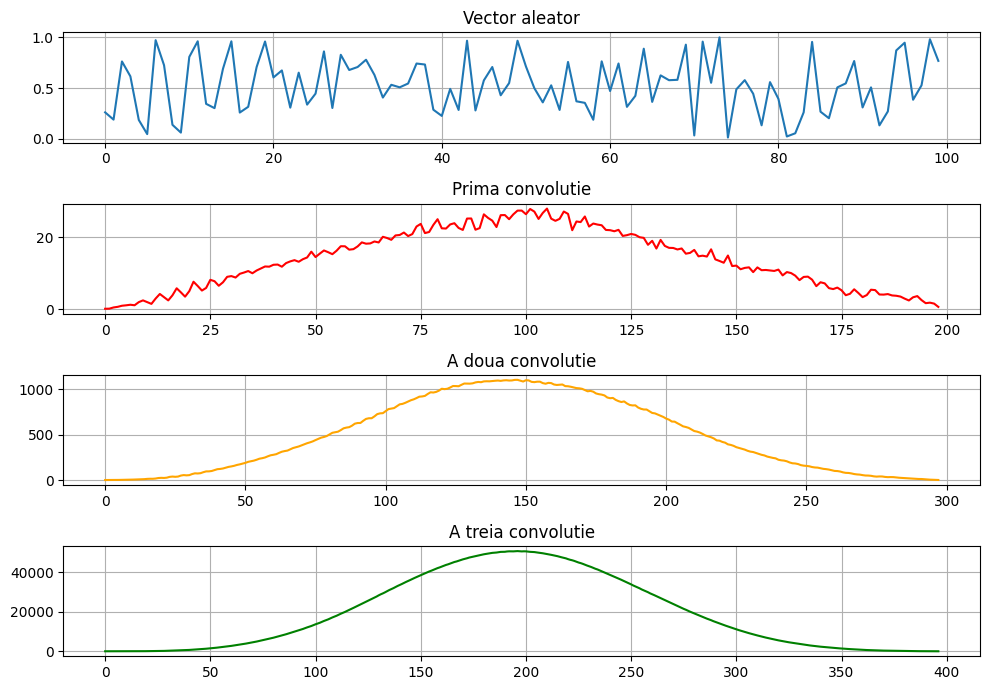

In [95]:
# Exercitiul 1
def convolutie(x: np.ndarray, h: np.ndarray):
    M = len(x)
    N = len(h)
    y = np.zeros(M + N - 1)

    for n in range(M + N - 1):
        for k in range(max(0, n - M + 1), min(N, n + 1)):
            y[n] += h[k] * x[n - k]

    return y

x = np.random.random(100)
semnal_original = x.copy()

fig, axs = plt.subplots(4, 1, figsize=(10, 7))
axs[0].plot(x)
axs[0].set_title('Vector aleator')

x = convolutie(x, semnal_original)
axs[1].plot(x, color='red')
axs[1].set_title('Prima convolutie')

x = convolutie(x, semnal_original)
axs[2].plot(x, color='orange')
axs[2].set_title('A doua convolutie')

x = convolutie(x, semnal_original)
axs[3].plot(x, color='green')
axs[3].set_title('A treia convolutie')

for ax in axs:
    ax.grid(True)
plt.tight_layout()

if not os.path.exists('ex1'):
    os.mkdir('ex1')

plt.savefig(os.path.join('ex1', f"ex1.png"))
plt.savefig(os.path.join('ex1', f"ex1.pdf"))

plt.show()

# Cu cat facem mai multe operatii de convolutie cu atat va aparea o Gaussiana mai precisa

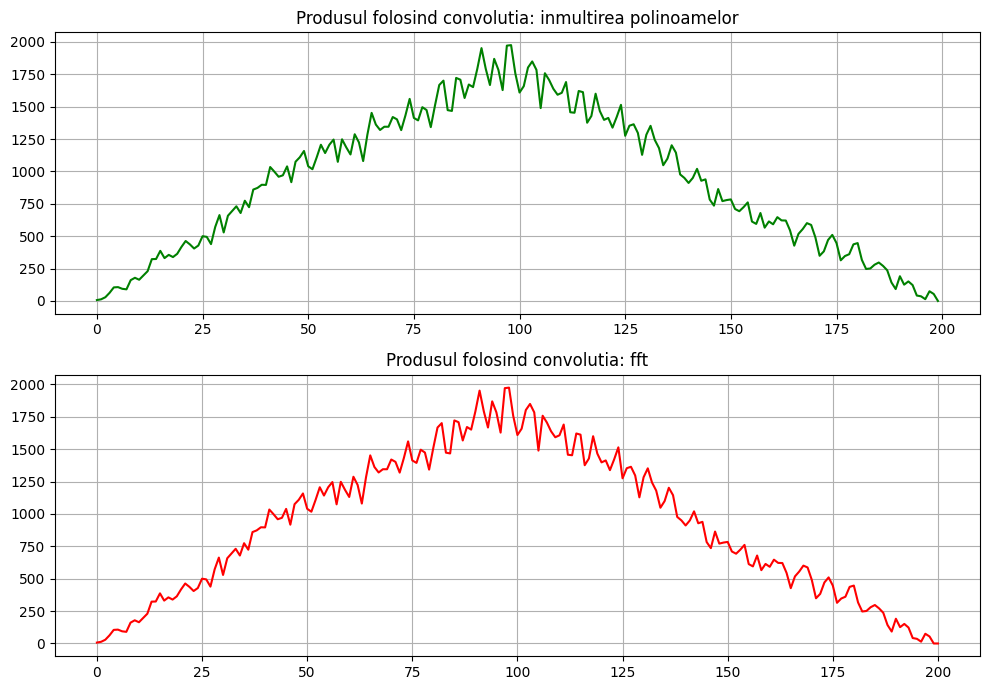

In [96]:
# Exercitiul 2
N = 100
p_coef = np.random.randint(0, 10, size=N + 1)
q_coef = np.random.randint(0, 10, size=N + 1)

p = np.poly1d(p_coef)
q = np.poly1d(q_coef)

fig, axs = plt.subplots(2, 1, figsize=(10, 7))
axs[0].plot(sig.convolve(p, q), color='green')
axs[0].set_title('Produsul folosind convolutia: inmultirea polinoamelor')

axs[1].plot(np.real(np.fft.ifft(np.fft.fft(p, n=2*N+1) * np.fft.fft(q, n=2*N+1))), color='red')
axs[1].set_title('Produsul folosind convolutia: fft')

for ax in axs:
    ax.grid(True)
plt.tight_layout()

if not os.path.exists('ex2'):
    os.mkdir('ex2')

plt.savefig(os.path.join('ex2', f"ex2.png"))
plt.savefig(os.path.join('ex2', f"ex2.pdf"))

plt.show()

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009]


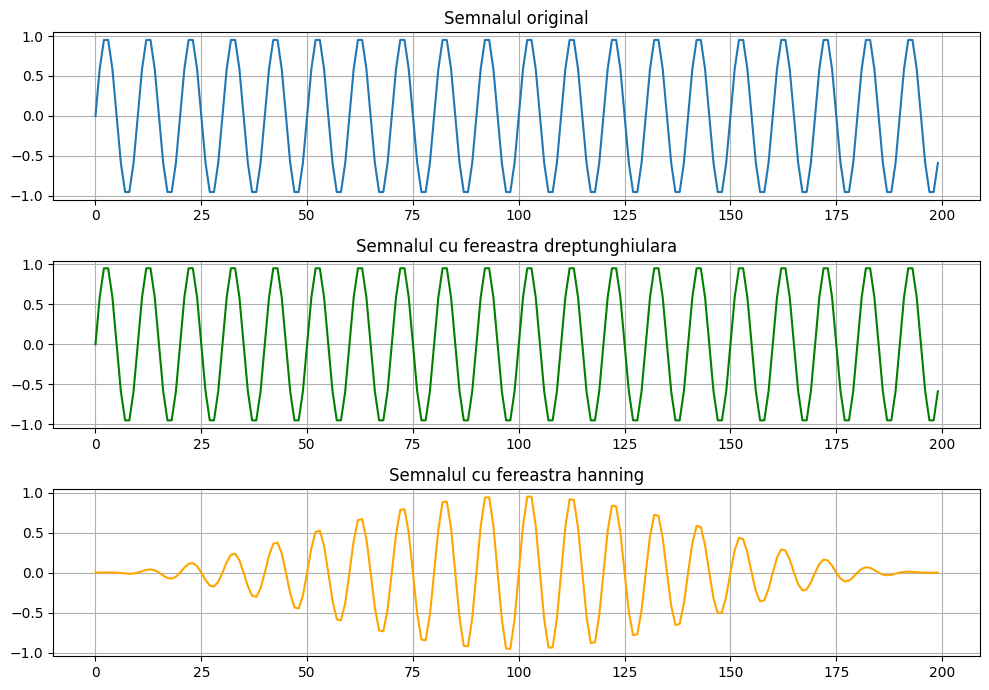

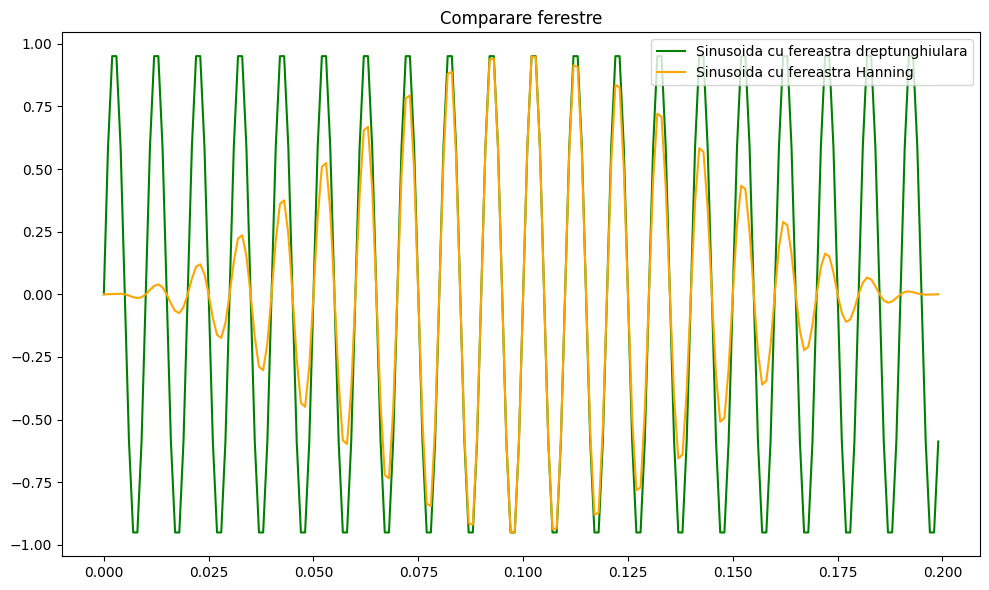

In [97]:
# Exercitiul 3
def fereastra_dreptunghiulara(N: int):
    return np.ones(N)

def fereastra_hanning(N: int):
    return 0.5 - 0.5 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

def sinusoida(A: float, f: float, t: int):
    return A * np.sin(2 * np.pi * f * t)

f = 100
fs = 1000
N = 200
t = np.arange(N) / fs
print(np.arange(10) / fs)
semnal = sinusoida(1, f, t)

semnal_dreptunghiular = semnal * fereastra_dreptunghiulara(N)
semnal_hanning = semnal * fereastra_hanning(N)

fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(semnal)
axs[0].set_title('Semnalul original')

axs[1].plot(semnal_dreptunghiular, color='green')
axs[1].set_title('Semnalul cu fereastra dreptunghiulara')

axs[2].plot(semnal_hanning, color='orange')
axs[2].set_title('Semnalul cu fereastra hanning')

for ax in axs:
    ax.grid(True)
    
plt.tight_layout()

if not os.path.exists('ex3'):
    os.mkdir('ex3')

plt.savefig(os.path.join('ex3', f"ex3.png"))
plt.savefig(os.path.join('ex3', f"ex3.pdf"))

plt.show()

plt.figure(figsize=(10, 6))

plt.plot(t, semnal_dreptunghiular, label='Sinusoida cu fereastra dreptunghiulara', color='green')
plt.plot(t, semnal_hanning, label='Sinusoida cu fereastra Hanning', color='orange')
plt.title('Comparare ferestre')
plt.legend()

plt.tight_layout()

plt.savefig(os.path.join('ex3', f"ex3_comparatie.png"))
plt.savefig(os.path.join('ex3', f"ex3_comparatie.pdf"))

plt.show()

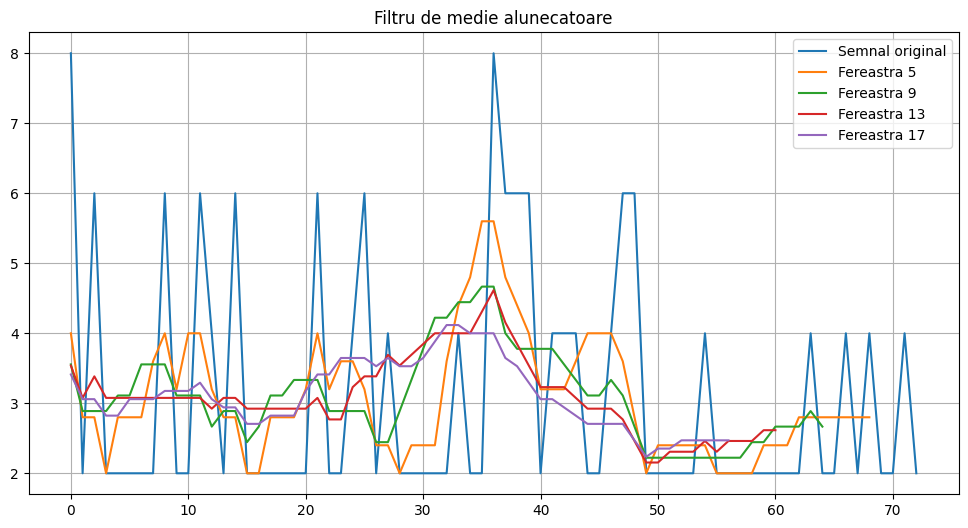

In [98]:
# Exercitiul 4
import pandas as pd
from scipy.signal import butter, filtfilt

dataset = pd.read_csv('data/Train.csv')

# Pct a
porțiune_semnal = dataset['Count'].head(3 * 24 + 1)

# Pct b
def filtru_medie_alunecatoare(semnal, w):
    return np.convolve(semnal, np.ones(w), 'valid') / w

dimensiune_ferestre = [5, 9, 13, 17]

plt.figure(figsize=(12, 6))
plt.plot(porțiune_semnal, label='Semnal original')

for w in dimensiune_ferestre:
    semnal_neted = filtru_medie_alunecatoare(porțiune_semnal, w)
    plt.plot(semnal_neted, label=f'Fereastra {w}')

plt.title('Filtru de medie alunecatoare')
plt.legend()
plt.grid()

if not os.path.exists('ex4'):
    os.mkdir('ex4')

plt.savefig(os.path.join('ex4', f"ex4_b.png"))
plt.savefig(os.path.join('ex4', f"ex4_b.pdf"))

plt.show()

Frecventa de taiere: 2.7779296768195985e-05
Frecventa normalizata: 0.19999999999999998


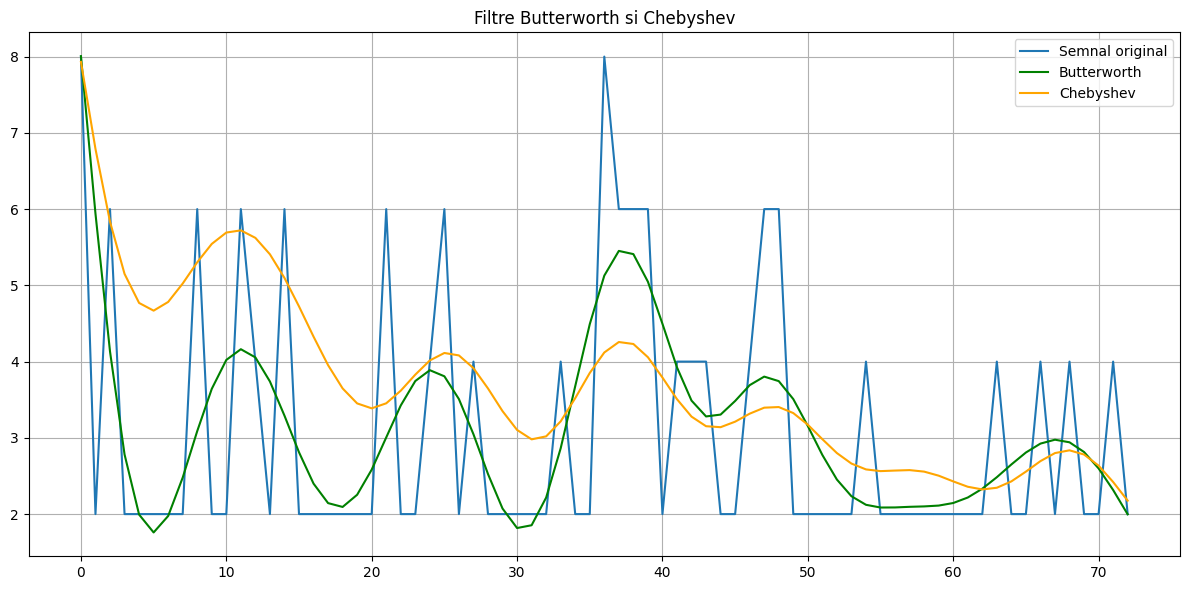

'\nDaca plotez intreg semnalul si nu doar o portiune, atunci se observa ca filtrul Chebyshev este mai precis decat cel Butterworth\ndeoarece are o atenuare mai mare, iar cu cat atenuarea ondulatiilor, rp, este mai mare, cu atat filtrul Chebyshev are \no atenuare mai mare. Dar daca plotez doar o portiune de 3 zile, atunci nu se observa o diferenta semnificativa intre cele doua filtre.\n'

In [104]:
# Exercitiul 4 - continuare
import pandas as pd
import scipy as sp

# pct c
dataset = pd.read_csv('data/Train.csv')
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'], format='%d-%m-%Y %H:%M')

start_time = dataset['Datetime'].iloc[0]
end_time = dataset['Datetime'].iloc[-1]

diff = end_time - start_time
total_samples = len(dataset)

fs = total_samples / diff.total_seconds() # sau 1/3600
f_niquist = fs / 2
f_taiere = fs / 10 # taiem frecventele mai mari de 10 ore
f_normalizat = f_taiere / f_niquist
print(f'Frecventa de taiere: {f_taiere}')
print(f'Frecventa normalizata: {f_normalizat}')

# pct d + e
ordin = 5
rp = 5
butter_b, butter_a = sp.signal.butter(ordin, f_normalizat, btype='low')
cheby_b, cheby_a = sp.signal.cheby1(ordin, rp, f_normalizat, btype='low')

semnal_filtrat_butter = sp.signal.filtfilt(butter_b, butter_a, porțiune_semnal)
semnal_filtrat_cheby = sp.signal.filtfilt(cheby_b, cheby_a, porțiune_semnal)

plt.figure(figsize=(12, 6))
plt.plot(porțiune_semnal, label='Semnal original')
plt.plot(semnal_filtrat_butter, label='Butterworth', color='green')
plt.plot(semnal_filtrat_cheby, label='Chebyshev', color='orange')
plt.title('Filtre Butterworth si Chebyshev')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig(os.path.join('ex4', f"ex4_e.png"))
plt.savefig(os.path.join('ex4', f"ex4_e.pdf"))

plt.show()
"""
Daca plotez intreg semnalul si nu doar o portiune, atunci se observa ca filtrul Chebyshev este mai precis decat cel Butterworth
deoarece are o atenuare mai mare, iar cu cat atenuarea ondulatiilor, rp, este mai mare, cu atat filtrul Chebyshev are 
o atenuare mai mare. Dar daca plotez doar o portiune de 3 zile, atunci nu se observa o diferenta semnificativa intre cele doua filtre.
"""

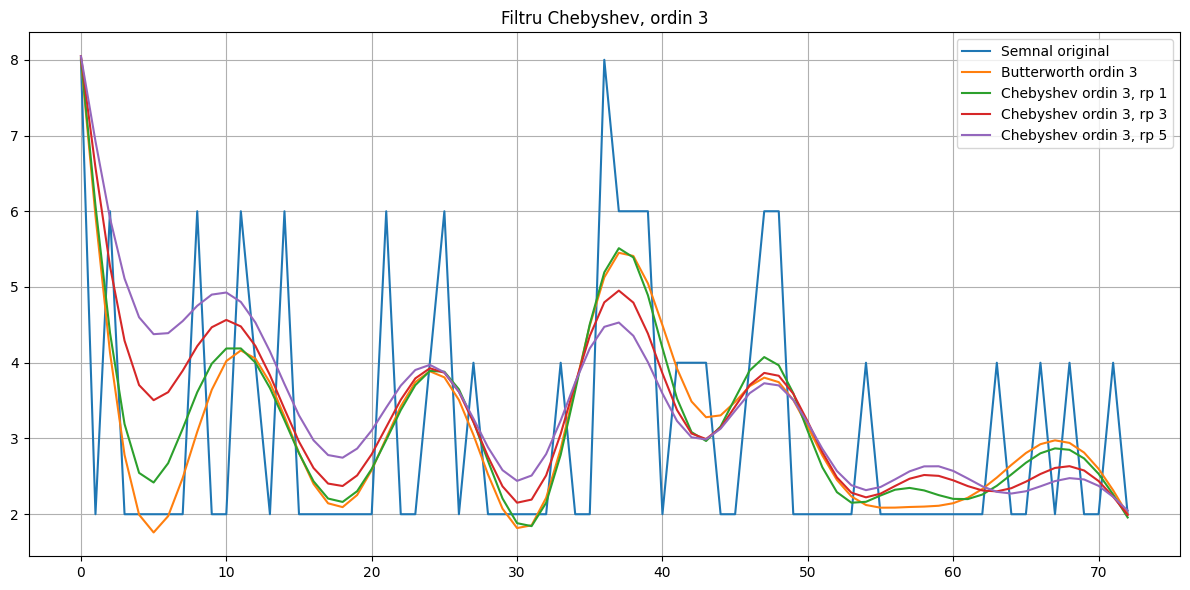

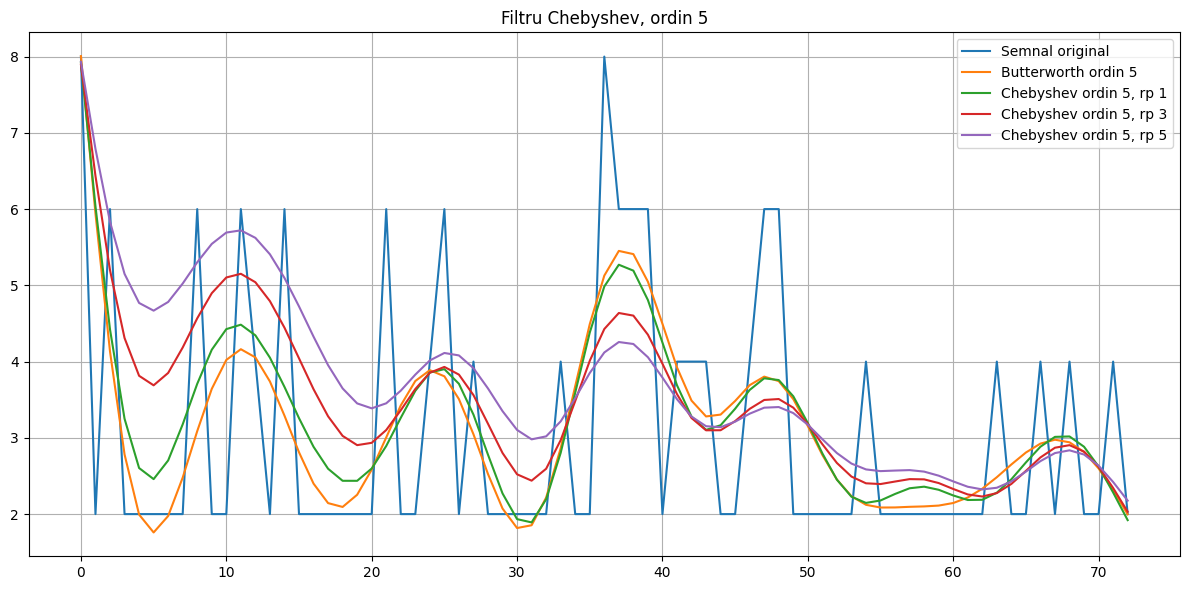

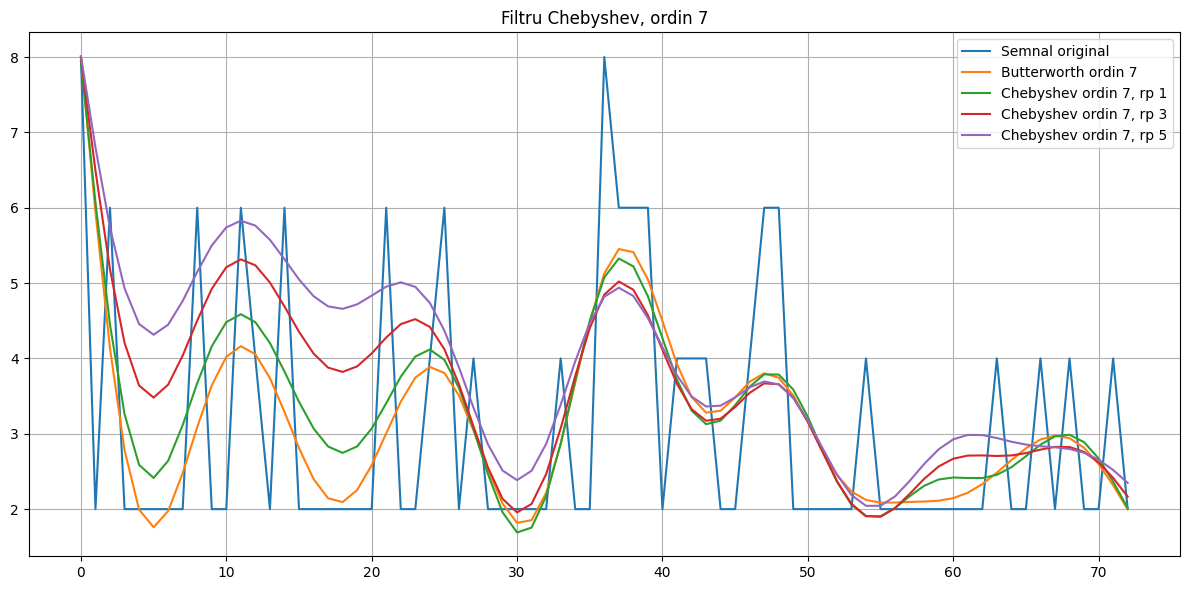

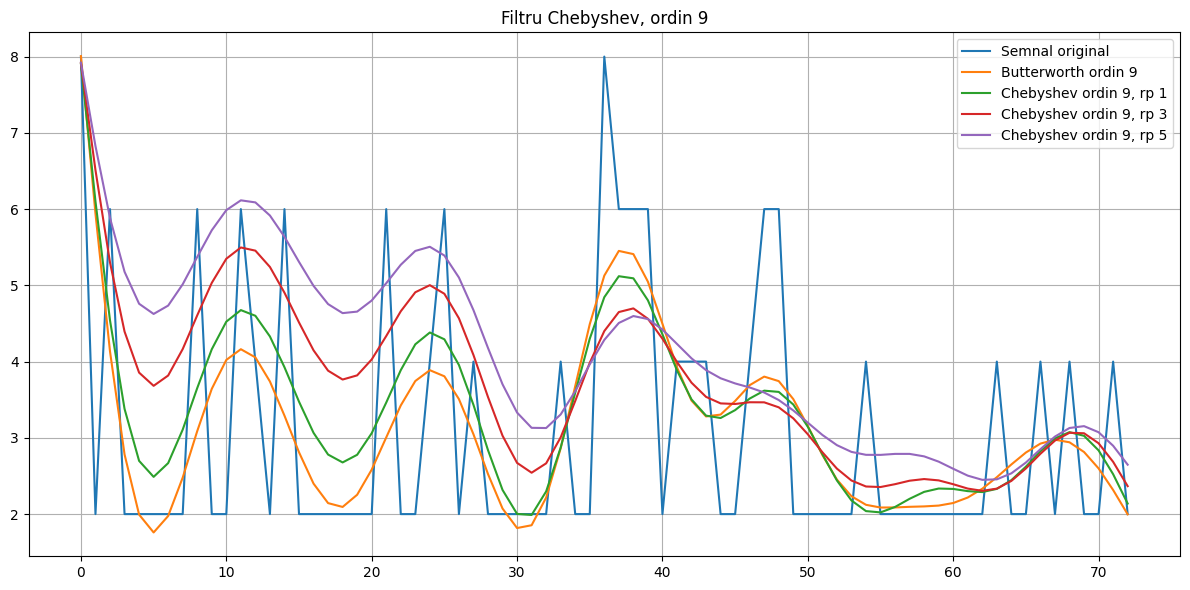

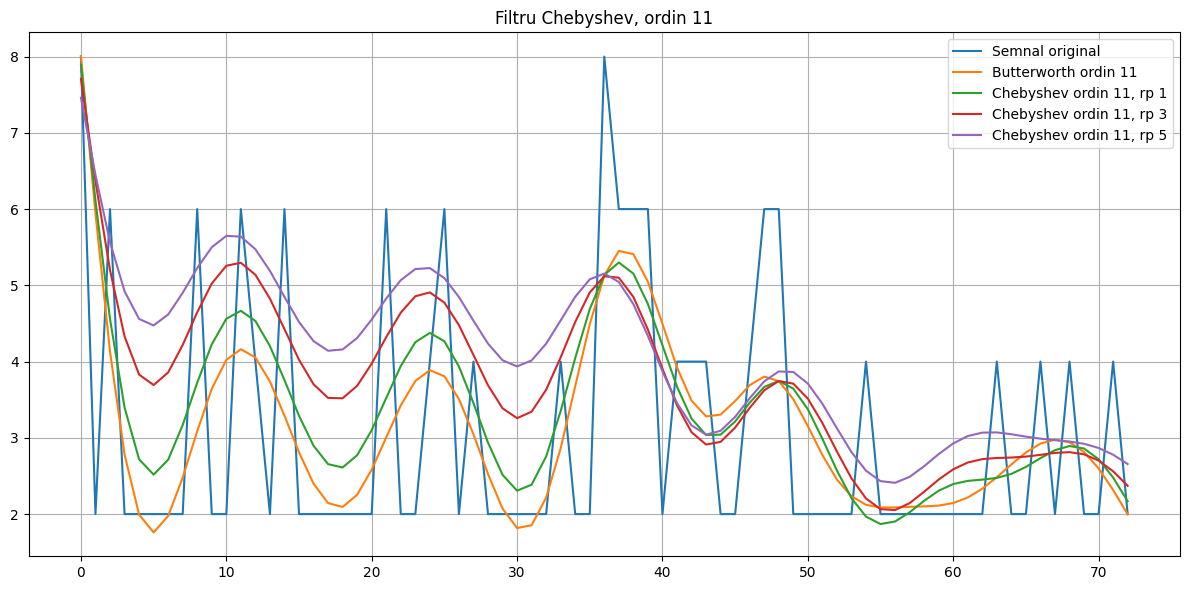

In [105]:
# Exercitiul 4 - continuare
# pct f

orders = [3, 5, 7, 9, 11]
rp = [1, 3, 5]

for order in orders:
    plt.figure(figsize=(12, 6))
    plt.plot(porțiune_semnal, label='Semnal original')
    butter_b, butter_a = sp.signal.butter(ordin, f_normalizat, btype='low')
    semnal_filtrat_butter = sp.signal.filtfilt(butter_b, butter_a, porțiune_semnal)
    plt.plot(semnal_filtrat_butter, label=f'Butterworth ordin {order}')

    for r in rp:
        cheby_b, cheby_a = sp.signal.cheby1(order, r, f_normalizat, btype='low')
        semnal_filtrat_cheby = sp.signal.filtfilt(cheby_b, cheby_a, porțiune_semnal)
        plt.plot(semnal_filtrat_cheby, label=f'Chebyshev ordin {order}, rp {r}')

    plt.title(f'Filtru Chebyshev, ordin {order}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

    plt.savefig(os.path.join('ex4', f"ex4_f_{order}.png"))
    plt.savefig(os.path.join('ex4', f"ex4_f_{order}.pdf"))

    plt.show()